In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("heart_2020_cleaned.csv")

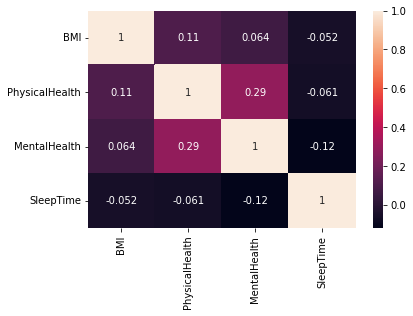

In [ ]:
# plot heatmap for the correlation between features - 
sns.heatmap(df.corr(method= 'pearson'),annot = True)

In [ ]:
#checking if there is any null value in dataset
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

Text(0.5, 1.0, 'Heart Disease')

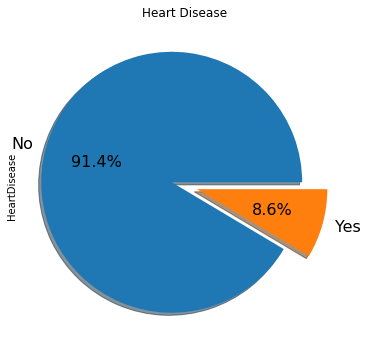

In [ ]:
#Reset indices
df.reset_index(inplace = True,drop = True)
plt.figure(figsize=(6,6))

# Pie plot
df['HeartDisease'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Heart Disease")

In [ ]:
#value distribution on PhysicalHealth
df['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

Distribution of the Classes in the subsample dataset
Yes    0.5
No     0.5
Name: HeartDisease, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


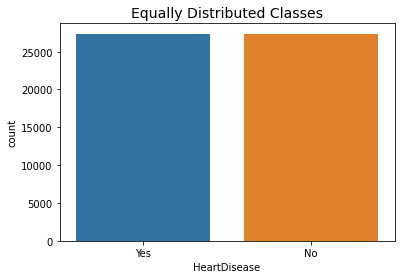

In [ ]:
#Under sampling the data so we can get a balanced dataset
df = df.sample(frac=1)

positive_df = df.loc[df['HeartDisease'] == 'Yes']
negative_df = df.loc[df['HeartDisease'] == 'No'][0:27373]

normal_distrbuted_df = pd.concat([positive_df, negative_df])

df = normal_distrbuted_df.sample(frac = 1, random_state = 42)

df.head()

print('Distribution of the Classes in the subsample dataset')
print(df['HeartDisease'].value_counts()/len(df))



sns.countplot('HeartDisease', data=df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

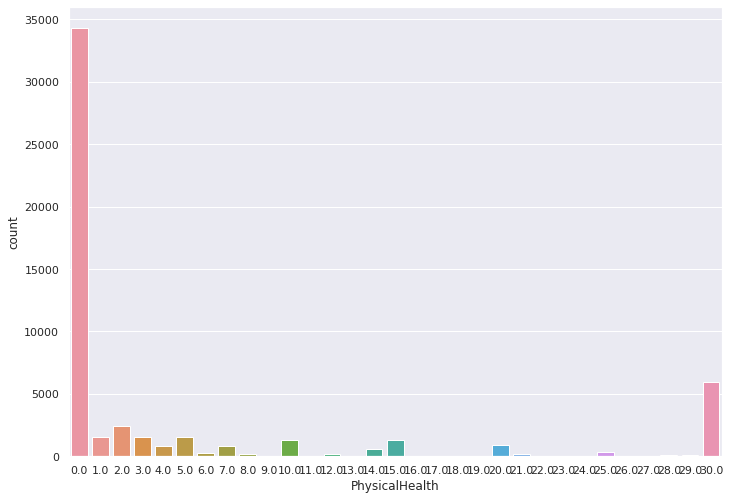

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="darkgrid")
sns.countplot(x="PhysicalHealth",  data=df);

In [ ]:
def barplot(category, order=None):

    for var in category:
      # Plot
      data_normalized = df.groupby(f'{var}')['HeartDisease'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index().sort_values(f'{var}')

      fig,ax = plt.subplots(figsize=(10,8))
   
      sns.barplot(x=var, y='Percentage', hue='HeartDisease', data=data_normalized, order=order, palette='Set1')

      # Personalization
      plt.xticks(rotation=0, fontsize=16, horizontalalignment='center', alpha=.7)
      plt.yticks(fontsize=14, alpha=.7)
      plt.grid(axis='both', alpha=.3)
      plt.title('Heart Disease', fontsize=18)
      ax.set_xlabel(f'{var}', fontsize=18)
      ax.set_ylabel('Percentage (%)', fontsize=18)
      ax.legend(frameon=False, ncol=len(df.columns), fontsize='xx-large')

      plt.gca().spines["top"].set_alpha(0.0)    
      plt.gca().spines["bottom"].set_alpha(0.3)
      plt.gca().spines["right"].set_alpha(0.0)    
      plt.gca().spines["left"].set_alpha(0.3)

    return plt.show()


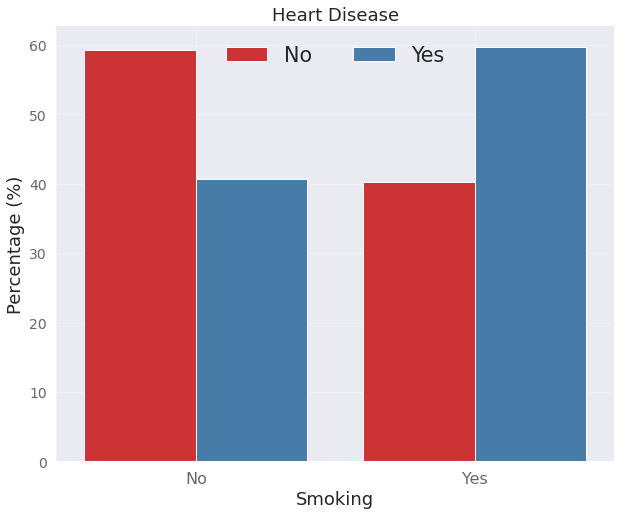

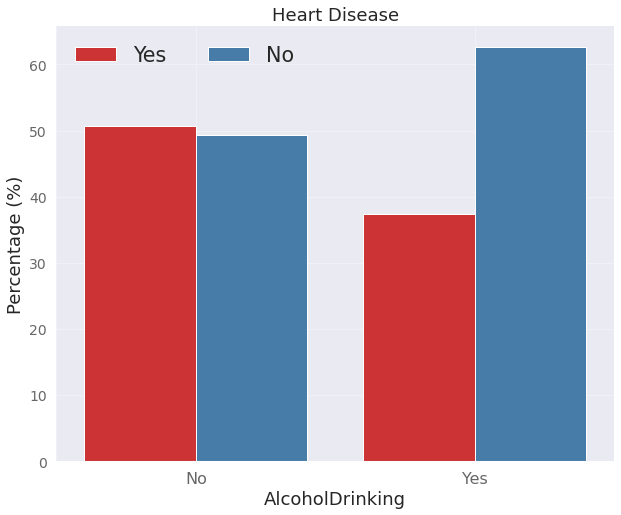

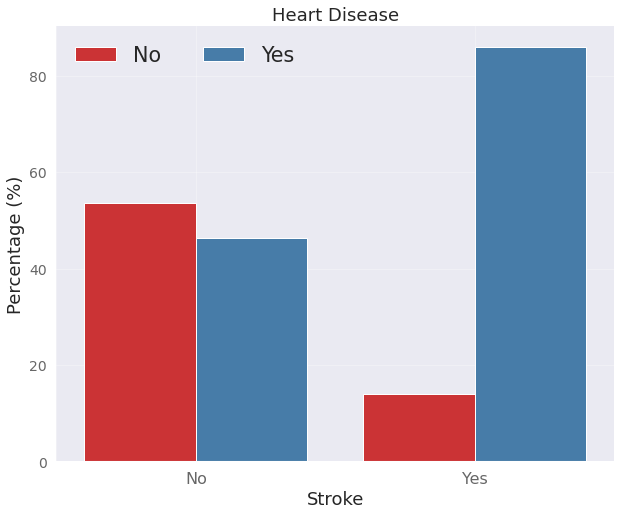

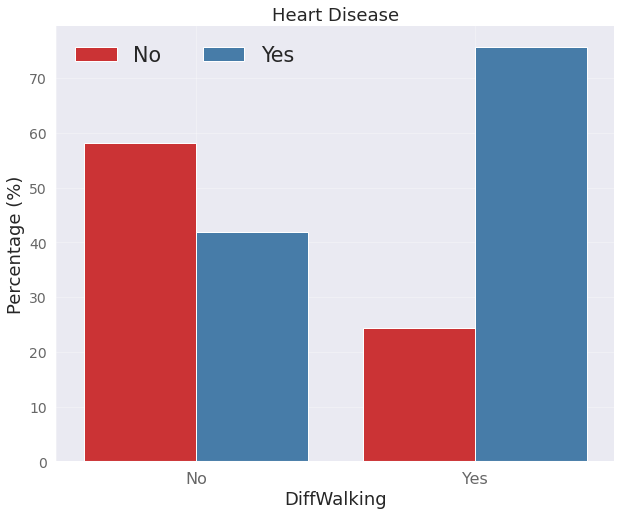

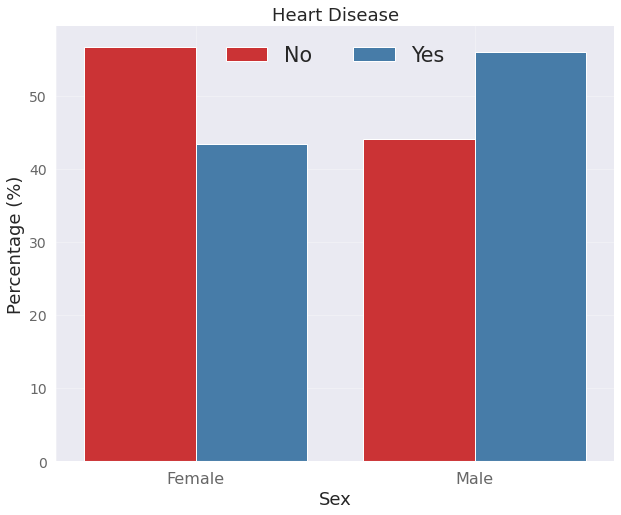

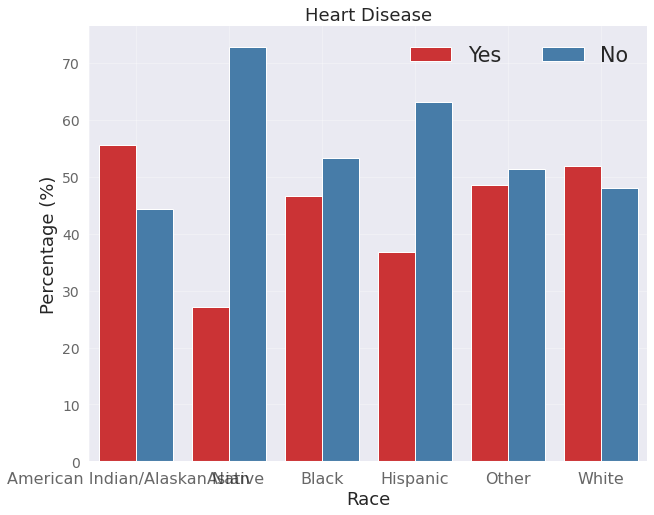

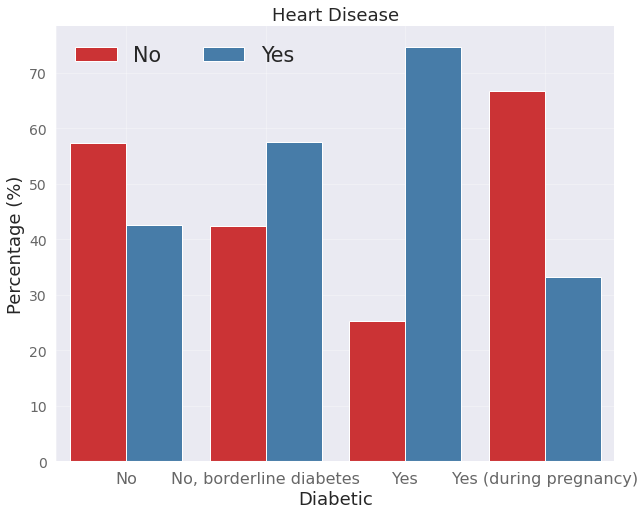

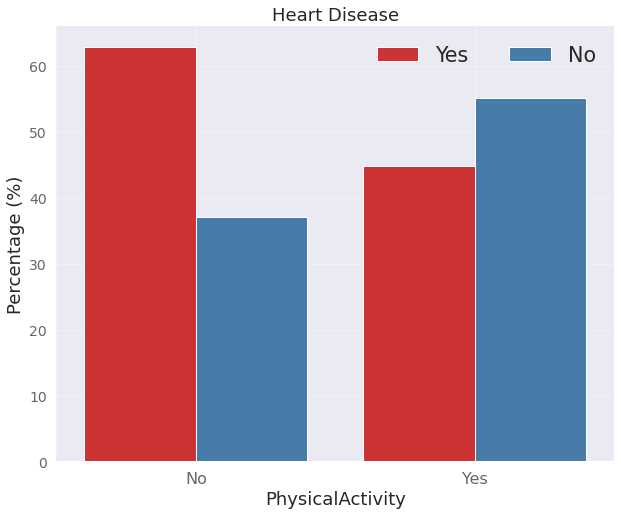

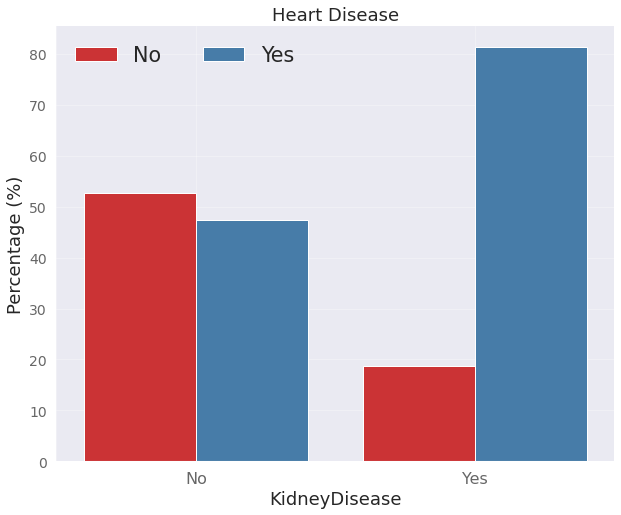

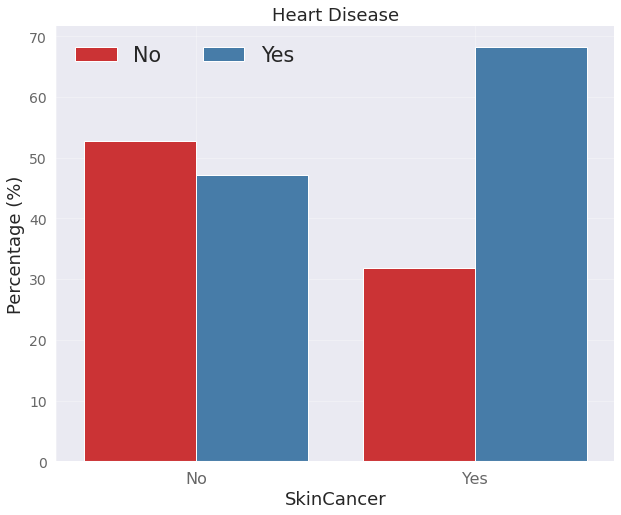

In [ ]:
# Barplot for "Smoking"
barplot(['Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','Race','Diabetic','PhysicalActivity','KidneyDisease','SkinCancer',])


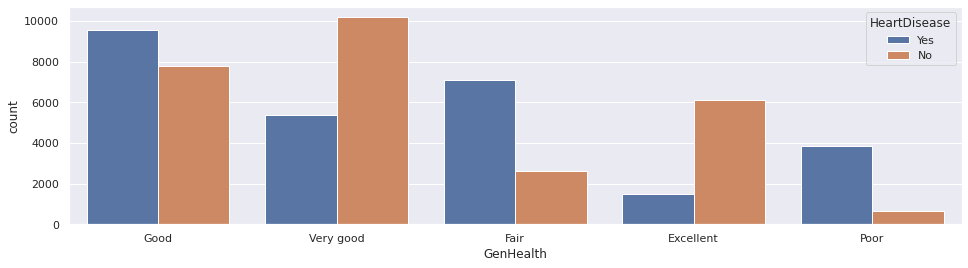

In [ ]:
#GenHealth and heart disease
plt.figure(figsize=(16,4))
sns.countplot(data=df, x='GenHealth', hue='HeartDisease')

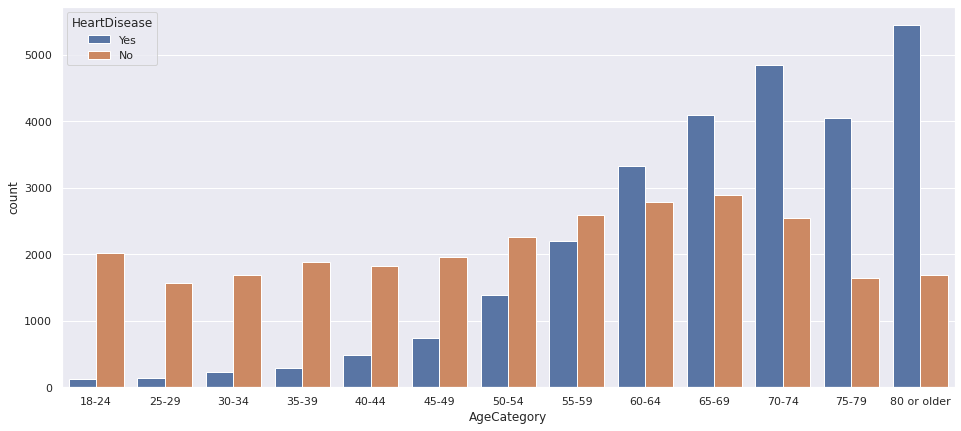

In [ ]:
#Age category and heart disease
plt.figure(figsize=(16,7))
sns.countplot(data=df, x='AgeCategory', hue='HeartDisease', order = df['AgeCategory'].sort_values().unique())

Text(0.5, 0, 'BMI indicator')

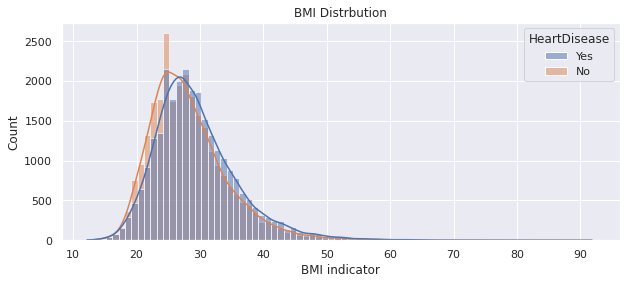

In [ ]:
#BMI and Heart Disease
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=df, x='BMI', hue='HeartDisease', binwidth=1, kde=True)

# Aesthetics
plt.title('BMI Distrbution')
plt.xlabel('BMI indicator')

We notice that the most healthy people who have BMI within 20 till about 28 and the more BMI this leads to increase HeartDisease, and that's make sense as BMI is indictator for obesity whic is one of direct cause of HeartDisease

## Data Preprocessing

In [ ]:
#Convert categorical data into 0,1
columns = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer"]
df[columns] = df[columns].apply(lambda x: x.map({'Yes':1,'No':0}))
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
248197,1,39.11,1,0,0,0.0,0.0,1,Female,60-64,Black,No,0,Good,8.0,0,0,0
245349,1,36.96,0,0,0,0.0,3.0,0,Male,65-69,White,No,0,Very good,9.0,0,0,0
300222,1,37.55,0,0,0,0.0,0.0,0,Female,70-74,White,Yes,1,Good,7.0,0,0,0
89386,1,26.50,0,0,1,30.0,0.0,0,Female,60-64,White,No,1,Fair,8.0,1,0,0
305010,1,27.26,0,0,0,0.0,0.0,0,Male,75-79,White,No,1,Good,8.0,0,0,0


In [ ]:
#Normalization
from sklearn.preprocessing import StandardScaler 
num_cols = ['MentalHealth', 'BMI', 'PhysicalHealth', 'SleepTime']
Scaler = StandardScaler()
df[num_cols] = Scaler.fit_transform(df[num_cols])

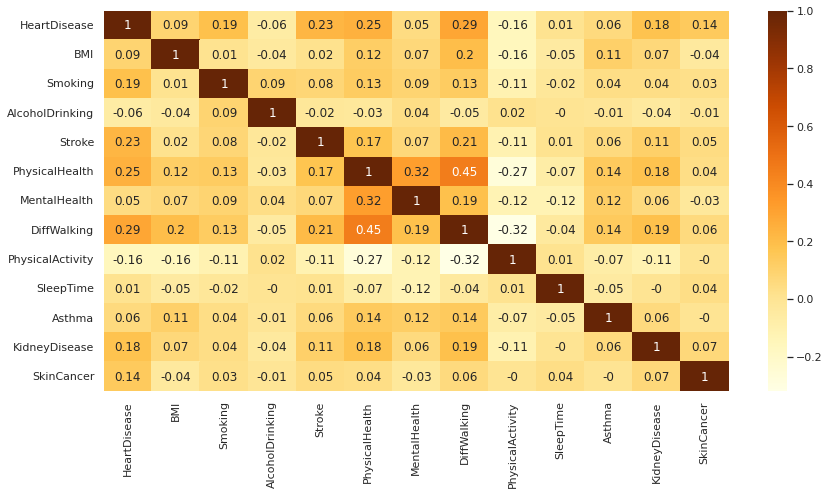

In [ ]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

In [ ]:
#Label Encoding 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Diabetic'] = le.fit_transform(df['Diabetic'])
Race = pd.get_dummies(df['Race'],drop_first=True)
GenHealth = pd.get_dummies(df['GenHealth'],drop_first=True)
AgeCategory = pd.get_dummies(df['AgeCategory'],drop_first=True)
new_df = pd.concat([df,Race, GenHealth, AgeCategory],axis=1)
new_df.drop(['Race', 'GenHealth', 'AgeCategory'],axis=1,inplace=True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54746 entries, 248197 to 256710
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      54746 non-null  int64  
 1   BMI               54746 non-null  float64
 2   Smoking           54746 non-null  int64  
 3   AlcoholDrinking   54746 non-null  int64  
 4   Stroke            54746 non-null  int64  
 5   PhysicalHealth    54746 non-null  float64
 6   MentalHealth      54746 non-null  float64
 7   DiffWalking       54746 non-null  int64  
 8   Sex               54746 non-null  int64  
 9   Diabetic          54746 non-null  int64  
 10  PhysicalActivity  54746 non-null  int64  
 11  SleepTime         54746 non-null  float64
 12  Asthma            54746 non-null  int64  
 13  KidneyDisease     54746 non-null  int64  
 14  SkinCancer        54746 non-null  int64  
 15  Asian             54746 non-null  uint8  
 16  Black             54746 non-null  

In [ ]:
new_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,...,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80 or older
248197,1,1.588403,1,0,0,-0.539804,-0.496201,1,0,0,...,0,0,0,0,0,1,0,0,0,0
245349,1,1.256476,0,0,0,-0.539804,-0.145605,0,1,0,...,0,0,0,0,0,0,1,0,0,0
300222,1,1.347563,0,0,0,-0.539804,-0.496201,0,0,2,...,0,0,0,0,0,0,0,1,0,0
89386,1,-0.358390,0,0,1,2.476259,-0.496201,0,0,0,...,0,0,0,0,0,1,0,0,0,0
305010,1,-0.241058,0,0,0,-0.539804,-0.496201,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10585,0,0.675989,0,0,0,-0.539804,-0.496201,0,1,0,...,0,0,0,0,1,0,0,0,0,0
318420,0,-0.823089,0,0,0,-0.539804,-0.496201,0,1,0,...,0,0,0,0,0,0,0,0,0,0
45933,0,-1.625891,0,0,0,2.476259,-0.496201,0,0,0,...,0,0,0,0,0,0,0,0,1,0
225170,1,0.395008,1,1,0,-0.338733,-0.496201,0,1,0,...,0,0,0,0,0,1,0,0,0,0


# Dataset Split and Normalization

In [ ]:
#Train and Test split
from sklearn.model_selection import train_test_split
X = new_df.drop('HeartDisease',axis=1)
y = new_df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
#Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_train)
scaled_xtest = scaler.fit_transform(X_test)
scaled_X

array([[ 0.66419742,  1.01572829, -0.2417506 , ..., -0.39587368,
         2.89899496, -0.38566956],
       [-0.30113556,  1.01572829, -0.2417506 , ...,  2.52605834,
        -0.34494713, -0.38566956],
       [ 0.23464734, -0.98451526, -0.2417506 , ..., -0.39587368,
        -0.34494713, -0.38566956],
       ...,
       [ 1.64646608,  1.01572829, -0.2417506 , ..., -0.39587368,
        -0.34494713, -0.38566956],
       [ 2.37931855,  1.01572829, -0.2417506 , ..., -0.39587368,
        -0.34494713, -0.38566956],
       [ 1.02754445,  1.01572829, -0.2417506 , ..., -0.39587368,
        -0.34494713, -0.38566956]])

## Model 

In [ ]:
#Implementing all the models for our dataset

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
clf1 = LogisticRegression(max_iter =10000)
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf3 = SVC(kernel = 'rbf',  gamma=0.5, C=1, random_state = 0)
clf4 = GaussianNB()
clf5 = DecisionTreeClassifier(criterion = 'entropy', max_depth=4,random_state = 0)
clf6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

#Training the Classification models on the Train set
clf1.fit(scaled_X, y_train)
clf2.fit(scaled_X, y_train)
clf3.fit(scaled_X, y_train)
clf4.fit(scaled_X, y_train)
clf5.fit(X_train, y_train)
clf6.fit(X_train, y_train)

#Predicting the Test set results
y_pred_LR = clf1.predict(X_test)
y_pred_KNN = clf2.predict(X_test)
y_pred_SVC = clf3.predict(X_test)
y_pred_NB = clf4.predict(X_test)
y_pred_DTC = clf5.predict(X_test)
y_pred_RFC = clf6.predict(X_test)

#KEY PERFORMANCE INDICATORS (KPI)
#Generating the Confusion Matrix and Classification report
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
print('Accuracy of Logistic Regression Model is ', accuracy_score(y_test, y_pred_LR))
print('\n','Confusion Matrix of Logistic Regression Model:' '\n', confusion_matrix(y_test, y_pred_LR))
print('\n', '\n','Classification Report for Logistic Regression Model:' '\n',classification_report(y_test, y_pred_LR))
print('\n','\n','Accuracy of K-Nearest Neighbor Model is ', accuracy_score(y_test, y_pred_KNN))
print('\n','Confusion Matrix of K-Nearest Neighbor Model:' '\n', confusion_matrix(y_test, y_pred_KNN))
print('\n', '\n','Classification Report for K-Nearest Neighbor Model:' '\n',classification_report(y_test, y_pred_KNN))
print('\n','\n', 'Accuracy of Support Vector Classification Model is ', accuracy_score(y_test, y_pred_SVC))
print('\n','Confusion Matrix of Support Vector Classification Model:' '\n', confusion_matrix(y_test, y_pred_SVC))
print('\n', '\n','Classification Report for Support Vector Classification Model:' '\n',classification_report(y_test, y_pred_SVC))
print('\n','\n', 'Accuracy of Naive Bayes Classification  Model is ', accuracy_score(y_test, y_pred_NB))
print('\n','Confusion Matrix of Naive Bayes Classification  Model:' '\n', confusion_matrix(y_test, y_pred_NB))
print('\n', '\n','Classification Report for Naive Bayes Classification  Model:' '\n',classification_report(y_test, y_pred_NB))
print('\n','\n', 'Accuracy of Decision Tree Model is ', accuracy_score(y_test, y_pred_DTC))
print('\n','Confusion Matrix of Decision Tree Model:' '\n', confusion_matrix(y_test, y_pred_DTC))
print('\n', '\n','Classification Report for Decision Tree Model:' '\n',classification_report(y_test, y_pred_DTC))
print('\n','\n', 'Accuracy of Random Forest Model is ', accuracy_score(y_test, y_pred_RFC))
print('\n','Confusion Matrix of  Random Forest Model:' '\n', confusion_matrix(y_test, y_pred_RFC))
print('\n', '\n','Classification Report for  Random Forest Model:' '\n',classification_report(y_test, y_pred_RFC))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Accuracy of Logistic Regression Model is  0.5037749634680955

 Confusion Matrix of Logistic Regression Model:
 [[ 207 8141]
 [   9 8067]]

 
 Classification Report for Logistic Regression Model:
               precision    recall  f1-score   support

           0       0.96      0.02      0.05      8348
           1       0.50      1.00      0.66      8076

    accuracy                           0.50     16424
   macro avg       0.73      0.51      0.36     16424
weighted avg       0.73      0.50      0.35     16424


 
 Accuracy of K-Nearest Neighbor Model is  0.6754140282513394

 Confusion Matrix of K-Nearest Neighbor Model:
 [[6999 1349]
 [3982 4094]]

 
 Classification Report for K-Nearest Neighbor Model:
               precision    recall  f1-score   support

           0       0.64      0.84      0.72      8348
           1       0.75      0.51      0.61      8076

    accuracy                           0.68     16424
   macro avg       0.69      0.67      0.66     16424
weighted

## Decision Tree Plotting 

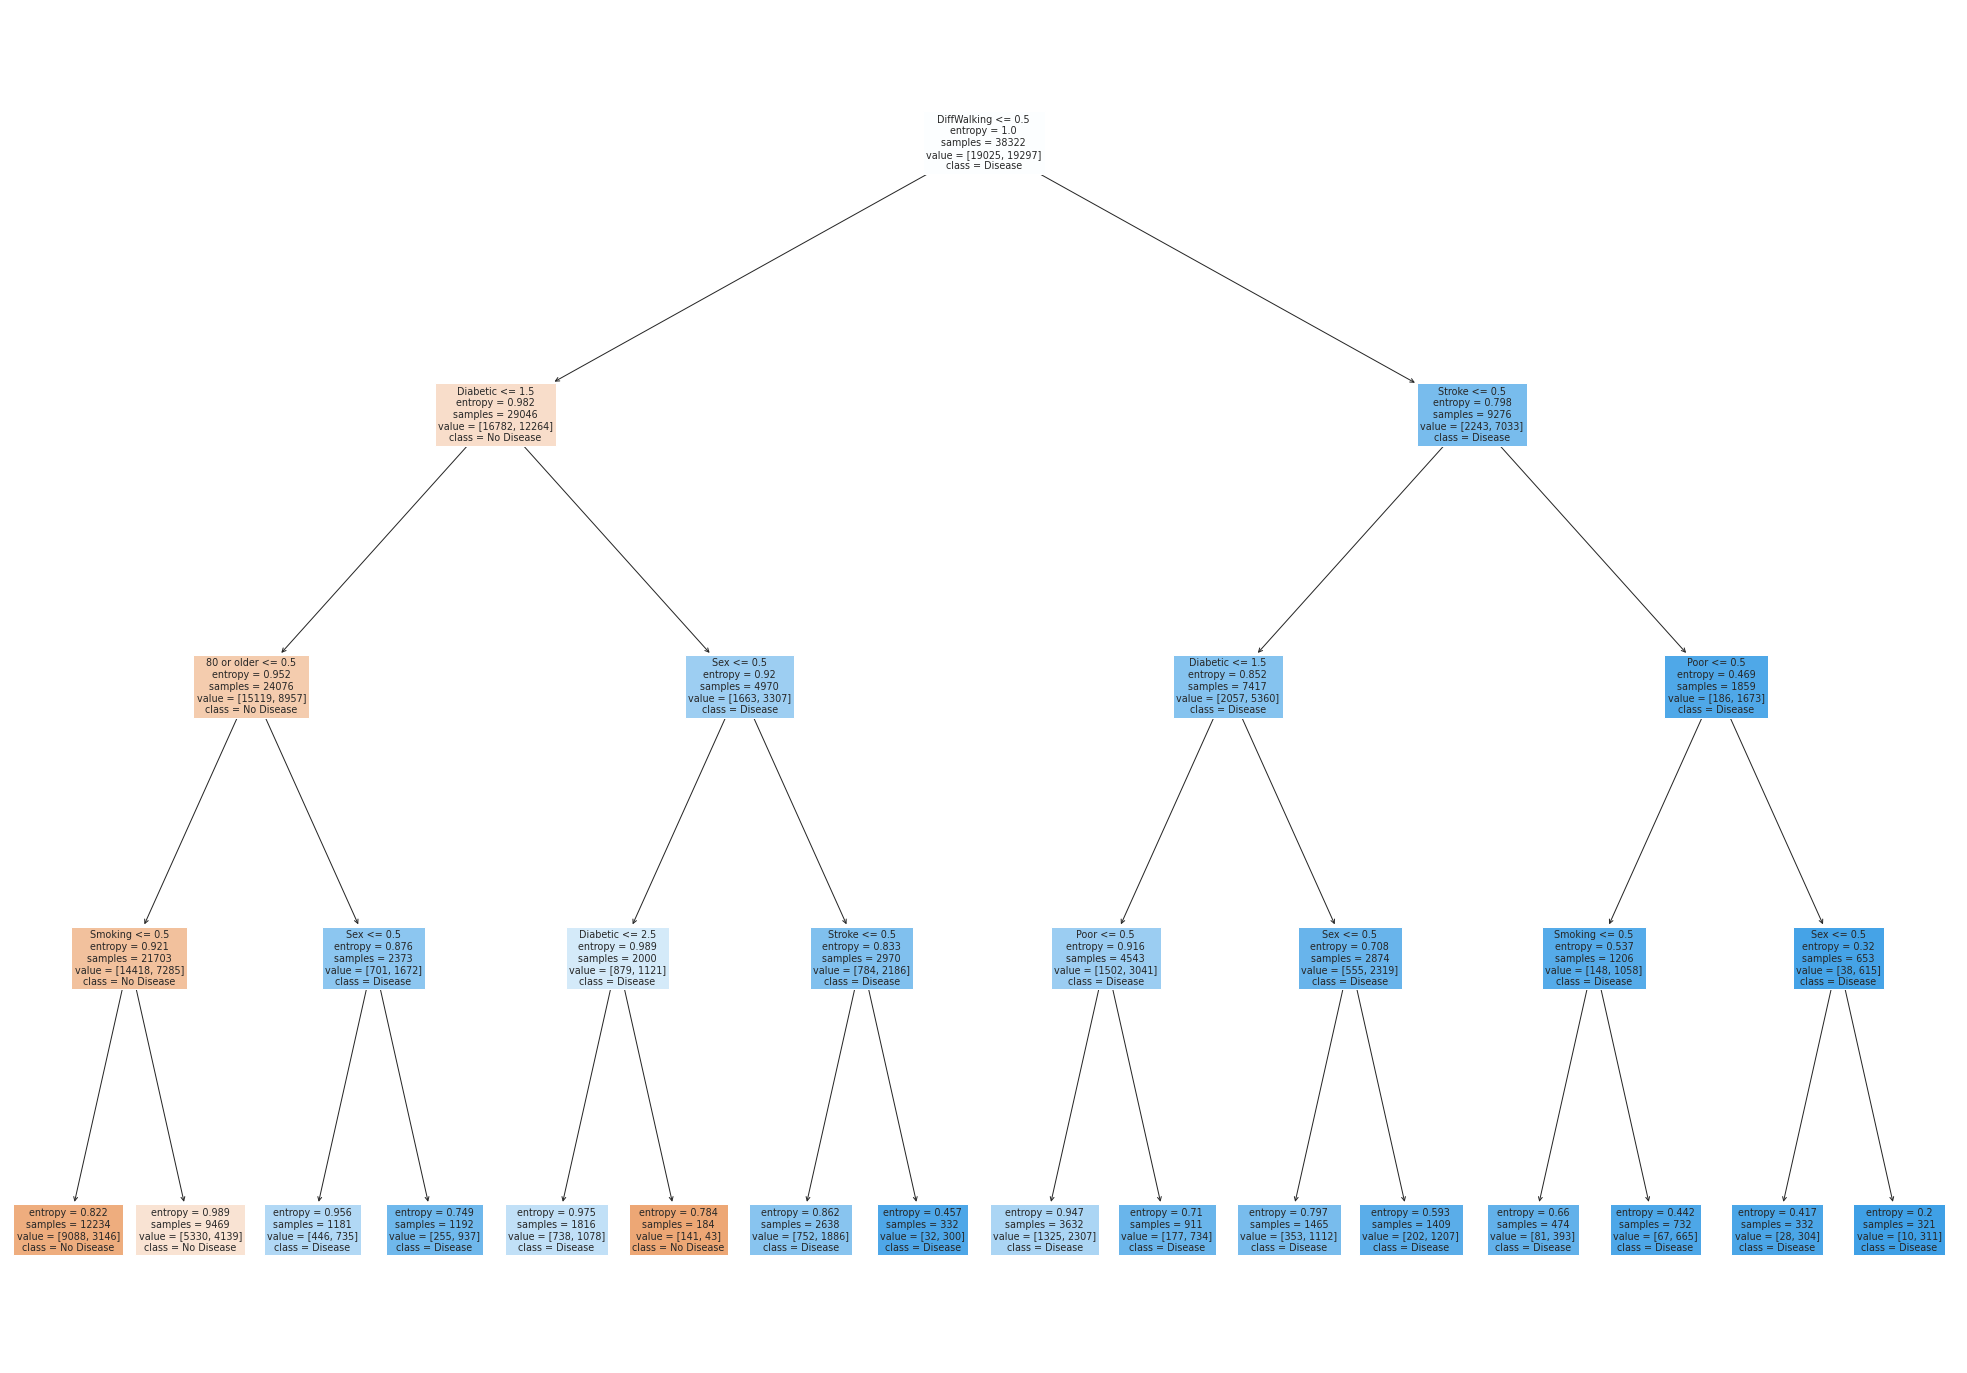

In [ ]:
# Tree strucutre for our decision tree model
from sklearn import tree
fig = plt.figure(figsize=(35,25))
plotting = tree.plot_tree(clf5,
                   feature_names=X.columns,
                   class_names=['No Disease', "Disease"],
                   filled=True)
fig.savefig('decisionForest.png')


In [ ]:
# generating the importances of features used by Decision Tree
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(clf5.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
6,DiffWalking,0.424
8,Diabetic,0.219
34,80 or older,0.155
1,Smoking,0.102
3,Stroke,0.046
7,Sex,0.038
21,Poor,0.016
31,65-69,0.000
32,70-74,0.000
30,60-64,0.000
